In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [2]:
df = pd.read_csv("matches.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df = df.drop(["umpire1", "umpire2", "umpire3", "dl_applied", "id"], axis=1)
df.shape

(636, 13)

In [4]:
df[df.isnull().any(axis=1)]

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,NaN,0,0,NaN,Feroz Shah Kotla
461,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium
466,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium
545,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,NaN,0,0,NaN,M Chinnaswamy Stadium
570,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,NaN,0,0,NaN,M Chinnaswamy Stadium


In [5]:
df = df.dropna(subset=['winner'])
df.isnull().sum()

season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [6]:
df['city'] = df['city'].fillna("Dubai")

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.dtypes

season                      int64
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
dtype: object

In [9]:
print(df['result'].unique())
print(df['season'].unique())

['normal' 'tie']
[2017 2008 2009 2010 2011 2012 2013 2014 2015 2016]


In [10]:
df = df.sort_values(by="season").reset_index(drop=True)
df.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali"
1,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla
2,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium
3,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens
4,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium


In [11]:
team_name_map = {
    "Rising Pune Supergiant" : "Rising Pune Supergiants"
}

column_to_fix = [df.columns]

for col in column_to_fix:
    df[col] = df[col].replace(team_name_map)

df['winner'].unique()

array(['Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Mumbai Indians', 'Kings XI Punjab',
       'Deccan Chargers', 'Pune Warriors', 'Kochi Tuskers Kerala',
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions'],
      dtype=object)

## IPL Data Analysis

##### How often does winning the toss lead to winning the match?

In [12]:
toss_effectiveness = (df['toss_winner'] == df['winner']).mean() * 100
print(f"Toss winning team won the match {toss_effectiveness:.2f}% of the time.")

Toss winning team won the match 51.34% of the time.


In [13]:
toss_effectiveness = (df['toss_winner'] == df['winner']).value_counts() / 633 * 100
toss_effectiveness.round(2)

True     51.34
False    48.66
Name: count, dtype: float64

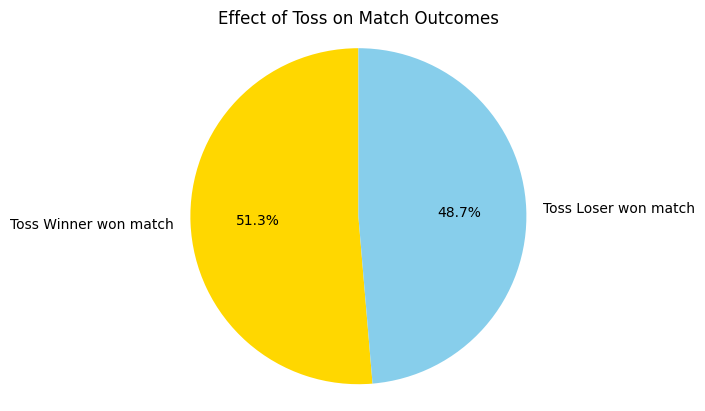

In [14]:
same_winner = df[df['toss_winner'] == df["winner"]]
count_same = same_winner.shape[0]
total = df.shape[0]

plt.pie([count_same, total - count_same],
        labels=["Toss Winner won match", "Toss Loser won match"],
        autopct="%1.1f%%",
        colors=["gold", "skyblue"],
        startangle=90)

plt.title("Effect of Toss on Match Outcomes")
plt.axis("equal")
plt.show()

##### What do teams choose more: bat or field after winning toss?

In [15]:
winning_toss_decisions = df['toss_decision'].value_counts()
winning_toss_decisions

toss_decision
field    361
bat      272
Name: count, dtype: int64

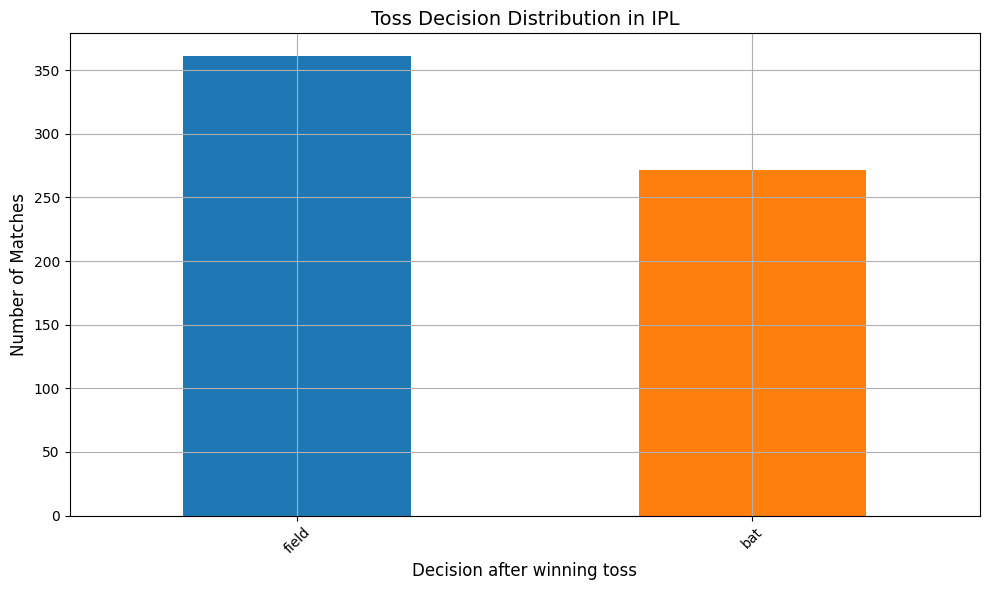

In [16]:
winning_toss_decisions.plot(kind="bar", figsize=(10, 6), rot=45, color=['#1f77b4', '#ff7f0e'])
plt.title("Toss Decision Distribution in IPL", fontsize=14)
plt.xlabel("Decision after winning toss", fontsize=12)
plt.ylabel("Number of Matches", fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

##### Which decision wins more games?

In [17]:
toss_win_match_win = df[df['toss_winner'] == df['winner']]
decision_wins = toss_win_match_win['toss_decision'].value_counts()
decision_wins

toss_decision
field    201
bat      124
Name: count, dtype: int64

*Insights: `"field"` is the more successful decision after winning the toss.*

##### Which Team Won Toss and Match Most Often?

In [18]:
toss_match_wins = df[df['toss_winner'] == df['winner']]['winner'].value_counts()
toss_match_wins

winner
Mumbai Indians                 48
Kolkata Knight Riders          44
Chennai Super Kings            42
Royal Challengers Bangalore    35
Rajasthan Royals               34
Delhi Daredevils               33
Kings XI Punjab                28
Deccan Chargers                19
Sunrisers Hyderabad            17
Gujarat Lions                  10
Rising Pune Supergiants         8
Kochi Tuskers Kerala            4
Pune Warriors                   3
Name: count, dtype: int64

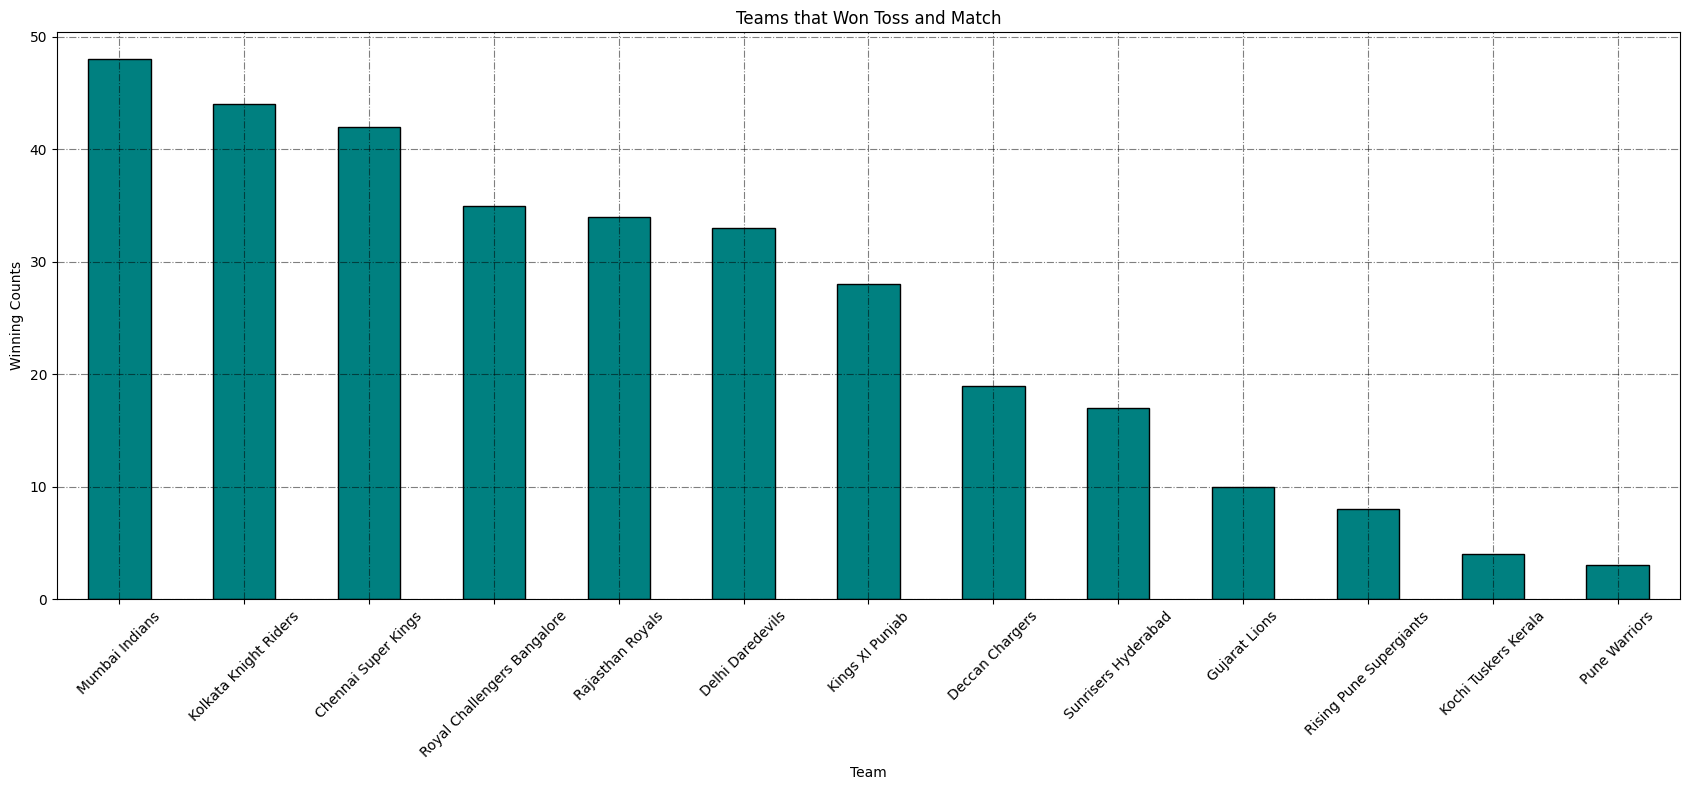

In [19]:
toss_match_wins.plot(kind="bar", figsize=(17, 8), color='teal', rot=45, edgecolor="black")
plt.title("Teams that Won Toss and Match")
plt.xlabel("Team")
plt.ylabel("Winning Counts")
plt.tight_layout()
plt.grid(linestyle="-.", color="black", alpha=0.5)
plt.show()

##### Wins by each team per season

In [20]:
wins_per_season = df.groupby(['season', 'winner']).size().unstack(fill_value=0).sort_values(by="season")
wins_per_season

winner,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
season,,,,,,,,,,,,,
2008,9,2,7,0,10,0,6,7,0,13,0,4,0
2009,8,9,10,0,7,0,3,5,0,6,0,9,0
2010,9,8,7,0,4,0,7,11,0,6,0,8,0
2011,11,6,4,0,7,6,8,10,4,6,0,10,0
2012,10,4,11,0,8,0,12,10,4,7,0,8,0
2013,12,0,3,0,8,0,6,13,4,11,0,9,10
2014,10,0,2,0,12,0,11,7,0,7,0,5,6
2015,10,0,5,0,3,0,7,10,0,7,0,8,7
2016,0,0,7,9,4,0,8,7,0,0,5,9,11


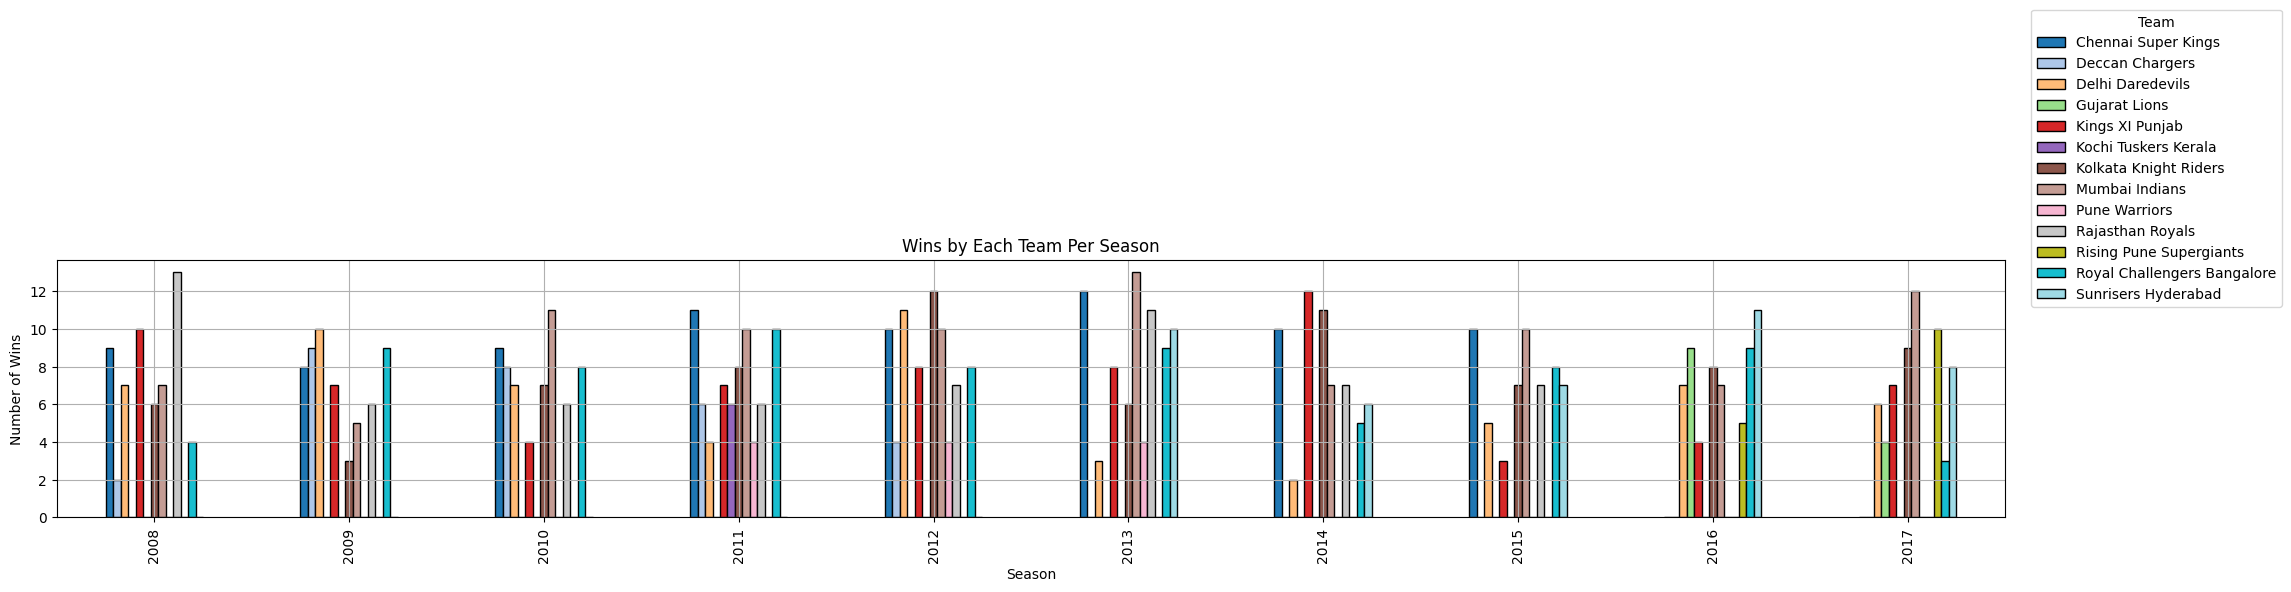

In [21]:
wins_per_season.plot(kind="bar", figsize=(23, 15), colormap='tab20', edgecolor="black")

plt.title("Wins by Each Team Per Season")
plt.xlabel("Season")
plt.ylabel("Number of Wins")
plt.legend(title="Team", bbox_to_anchor=(1.01, 2), loc="upper left")
plt.tight_layout()
plt.grid()

plt.show()

##### Team-wise Win Percentage Across Seasons

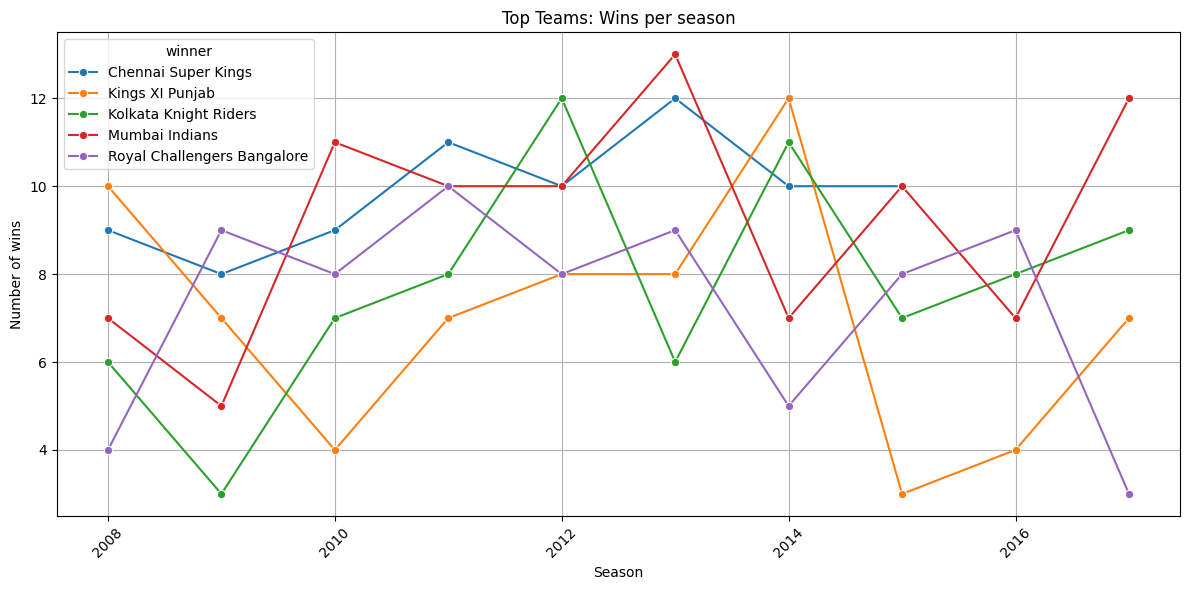

In [22]:
team_season = df.groupby(["season", "winner"]).size().reset_index(name="wins")
top_teams = df['winner'].value_counts().head(5).index

filtered = team_season[team_season['winner'].isin(top_teams)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered, x="season", y="wins", hue="winner", marker="o")
plt.title("Top Teams: Wins per season")
plt.xlabel("Season")
plt.ylabel("Number of wins")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

##### Who won the most "Player of the Match" awards?

In [23]:
top_players = df['player_of_match'].value_counts().head(15)
top_players

player_of_match
CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
MEK Hussey        12
AM Rahane         12
V Kohli           11
DR Smith          11
V Sehwag          11
JH Kallis         10
SR Watson         10
Name: count, dtype: int64

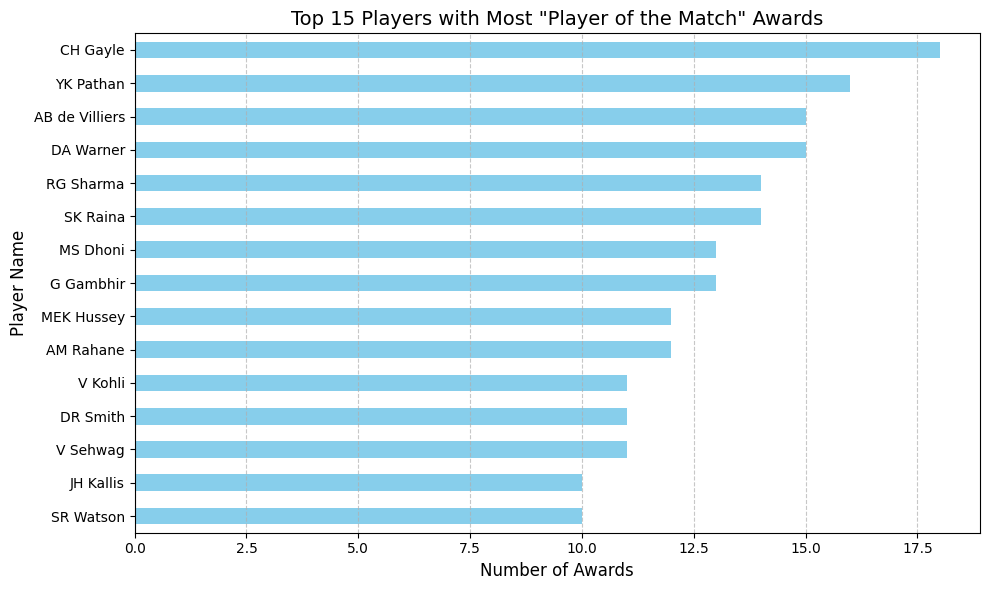

In [24]:
top_players.plot(kind="barh", figsize=(10, 6), color="skyblue")
plt.title('Top 15 Players with Most "Player of the Match" Awards', fontsize=14)
plt.xlabel("Number of Awards", fontsize=12)
plt.ylabel("Player Name", fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

##### Distribution of `win_by_runs` vs `win_by_wickets`

In [25]:
df[['win_by_runs', 'win_by_wickets']].describe()

,win_by_runs,win_by_wickets
count,633.000000,633.000000
mean,13.747235,3.388626
std,23.946920,3.420526
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,4.000000
75%,20.000000,7.000000
max,146.000000,10.000000


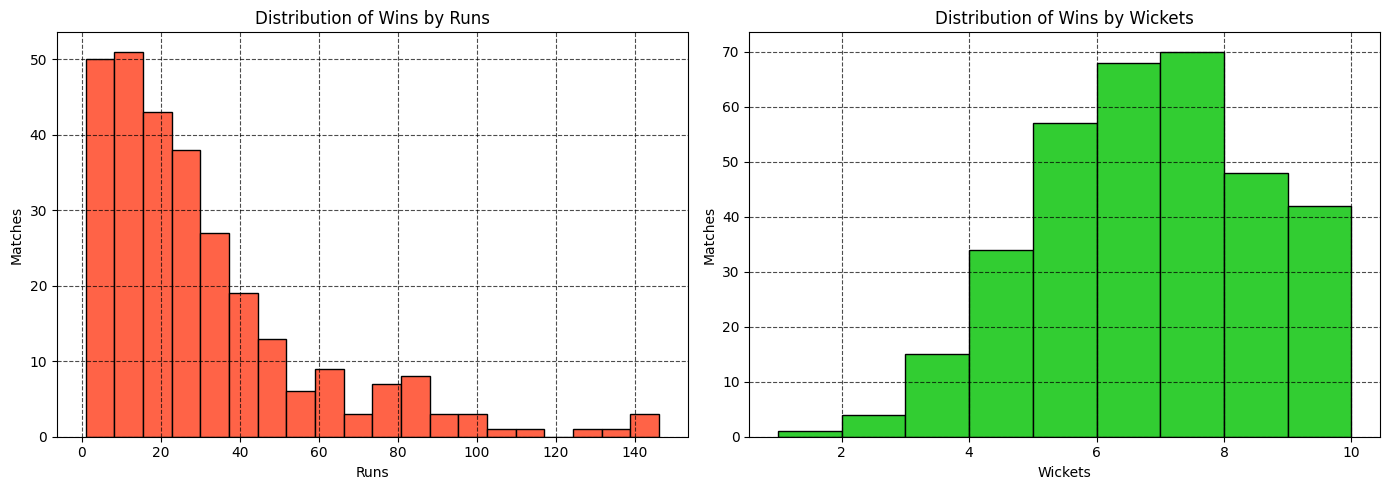

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

df[df['win_by_runs'] > 0]['win_by_runs'].plot(kind="hist", bins=20, color="tomato", ax=ax[0], edgecolor="black")
ax[0].set_title("Distribution of Wins by Runs")
ax[0].set_xlabel("Runs")
ax[0].set_ylabel("Matches")
ax[0].grid(linestyle="--", color="black", alpha=0.7)

df[df['win_by_wickets'] > 0]['win_by_wickets'].plot(kind="hist", bins=9, color="limegreen", ax=ax[1], edgecolor="black")
ax[1].set_title("Distribution of Wins by Wickets")
ax[1].set_xlabel("Wickets")
ax[1].set_ylabel("Matches")
ax[1].grid(linestyle="--", color="black", alpha=0.7)

plt.tight_layout()
plt.show()

Insights:

`Wins by Runs` - Most defending teams win by small margins (1–20 runs). Big wins are rare.

`Wins by Wickets` - Chasing teams usually win with 6–8 wickets in hand, indicating dominant chases.

`🎯 Overall` - Chasing gives teams more control, while defending leads to narrow finishes.

##### Largest win by runs & by wickets

In [27]:
df[df['win_by_runs'] == df['win_by_runs'].max()]

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
605,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla


In [28]:
df[df['win_by_wickets'] == df['win_by_wickets'].max()]

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
44,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy
60,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,Delhi Daredevils,0,10,DL Vettori,Newlands
167,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium
240,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium
250,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium
385,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali"
503,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla
564,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium
581,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ..."
590,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium


##### Which stadium hosted the most matches?

In [29]:
most_hosted_stadiums = df['venue'].value_counts().head(10)
most_hosted_stadiums

venue
M Chinnaswamy Stadium                         64
Eden Gardens                                  61
Feroz Shah Kotla                              59
Wankhede Stadium                              57
Rajiv Gandhi International Stadium, Uppal     49
MA Chidambaram Stadium, Chepauk               48
Punjab Cricket Association Stadium, Mohali    35
Sawai Mansingh Stadium                        33
Dr DY Patil Sports Academy                    17
Subrata Roy Sahara Stadium                    17
Name: count, dtype: int64

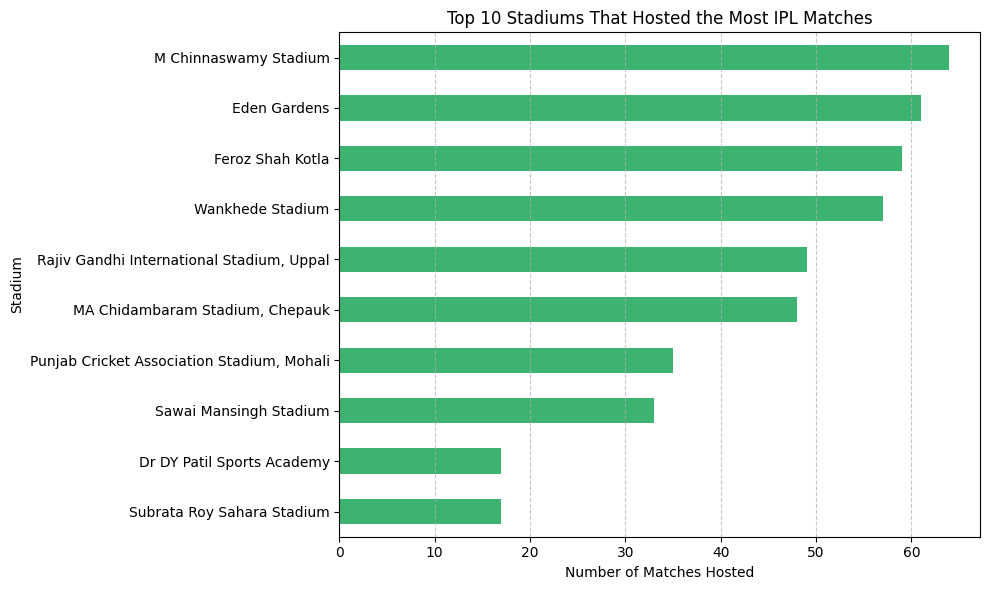

In [30]:
most_hosted_stadiums.plot(kind="barh", figsize=(10, 6), color="mediumseagreen")
plt.title("Top 10 Stadiums That Hosted the Most IPL Matches")
plt.xlabel("Number of Matches Hosted")
plt.ylabel("Stadium")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

##### Which cities hosted the most matches?

In [31]:
df['city'].value_counts().head(10)

city
Mumbai        85
Bangalore     64
Kolkata       61
Delhi         59
Hyderabad     49
Chennai       48
Chandigarh    46
Jaipur        33
Pune          32
Durban        15
Name: count, dtype: int64

In [32]:
df.groupby('city')['venue'].nunique().sort_values(ascending=False)

city
Mumbai            3
Pune              2
Chandigarh        2
Bangalore         1
Bloemfontein      1
Ahmedabad         1
Abu Dhabi         1
Chennai           1
Cuttack           1
Delhi             1
Dharamsala        1
Dubai             1
Durban            1
Cape Town         1
Centurion         1
Hyderabad         1
East London       1
Johannesburg      1
Indore            1
Kanpur            1
Kimberley         1
Kochi             1
Jaipur            1
Kolkata           1
Nagpur            1
Port Elizabeth    1
Raipur            1
Rajkot            1
Ranchi            1
Sharjah           1
Visakhapatnam     1
Name: venue, dtype: int64

In [33]:
df[df['city'] == "Mumbai"]['venue'].value_counts()

venue
Wankhede Stadium              57
Dr DY Patil Sports Academy    17
Brabourne Stadium             11
Name: count, dtype: int64

In [34]:
df[df['city'] == "Pune"]['venue'].value_counts()

venue
Subrata Roy Sahara Stadium                 17
Maharashtra Cricket Association Stadium    15
Name: count, dtype: int64

In [35]:
df[df['city'] == "Chandigarh"]['venue'].value_counts()

venue
Punjab Cricket Association Stadium, Mohali              35
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Name: count, dtype: int64

#####  Venue-wise Team Dominance

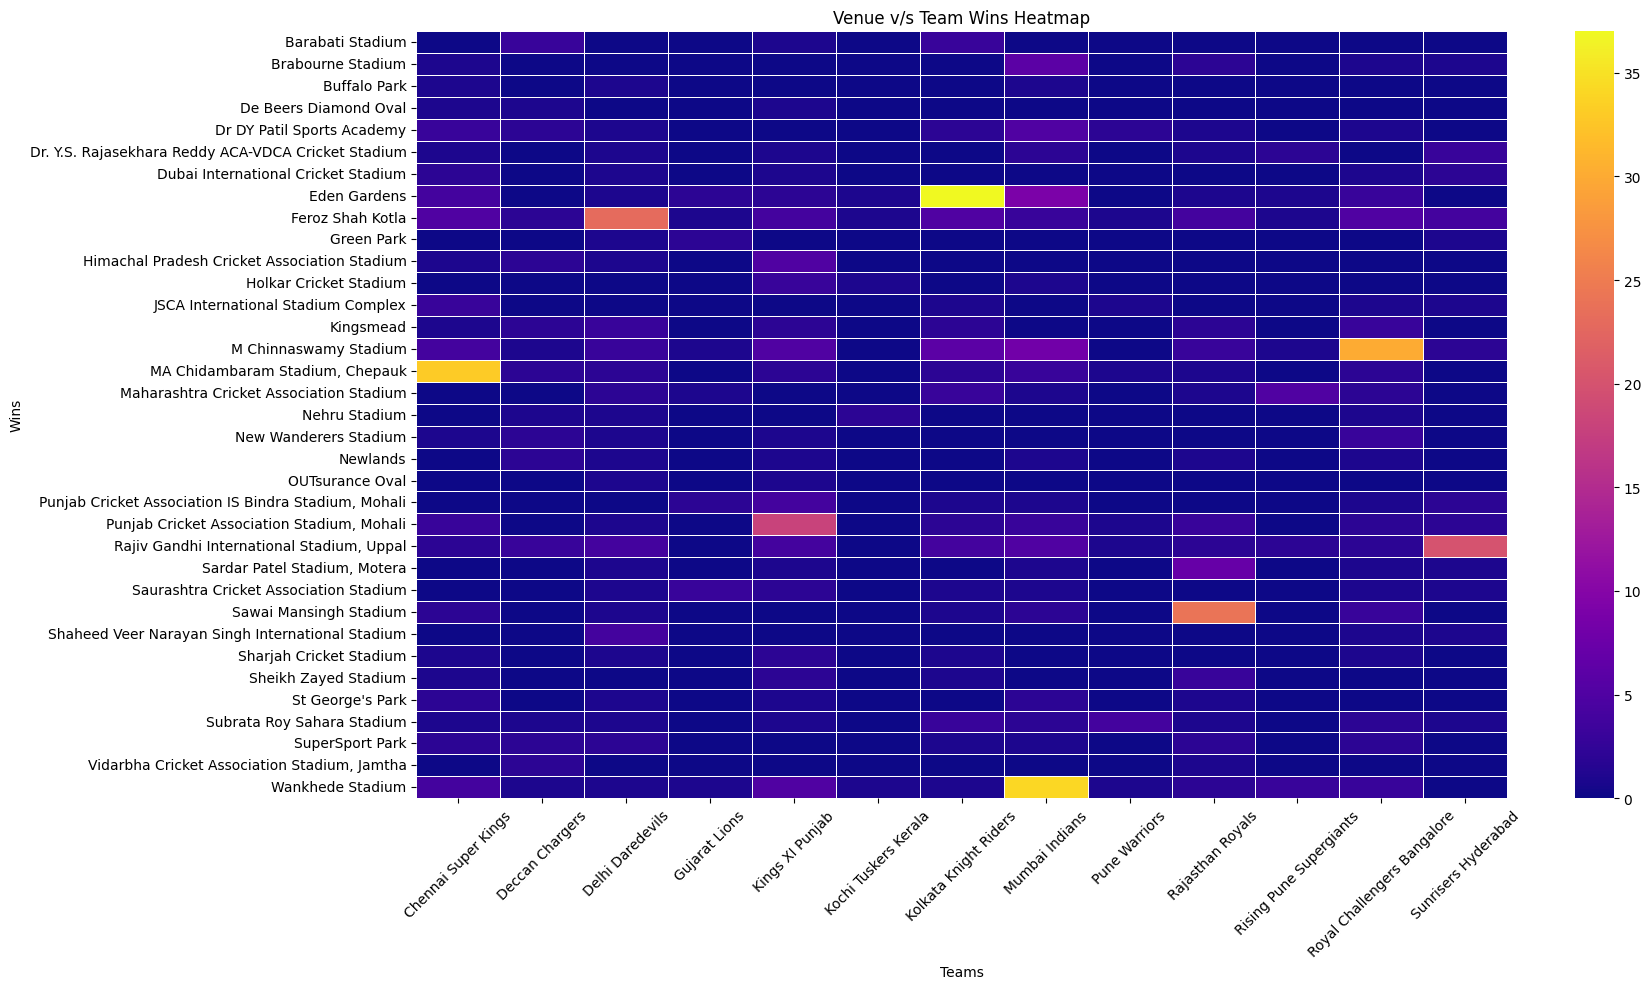

In [36]:
venue_team = df.groupby(["venue", "winner"]).size().unstack().fillna(0)

plt.figure(figsize=(18, 10))
sns.heatmap(venue_team, cmap="plasma", linewidths=0.7)
plt.title("Venue v/s Team Wins Heatmap")
plt.xlabel("Teams")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

##### How many matches were: Normal or tie?

In [37]:
df['result'].value_counts()

result
normal    626
tie         7
Name: count, dtype: int64

In [38]:
df[df['result'] == 'tie']

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
65,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,Rajasthan Royals,0,0,YK Pathan,Newlands
124,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk"
365,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal"
395,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium
436,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium
512,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera"
582,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium


##### Total matches played in each IPL season

In [39]:
df['season'].value_counts().sort_index()

season
2008    58
2009    57
2010    60
2011    72
2012    74
2013    76
2014    60
2015    57
2016    60
2017    59
Name: count, dtype: int64

In [40]:
teams_by_season = df.groupby('season').apply(
    lambda x: pd.unique(x[['team1', 'team2']].values.ravel())
)

for season, teams in teams_by_season.items():
    print(f"{season}: {sorted(teams)}")

2008: ['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils', 'Kings XI Punjab', 'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals', 'Royal Challengers Bangalore']
2009: ['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils', 'Kings XI Punjab', 'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals', 'Royal Challengers Bangalore']
2010: ['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils', 'Kings XI Punjab', 'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals', 'Royal Challengers Bangalore']
2011: ['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Royal Challengers Bangalore']
2012: ['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils', 'Kings XI Punjab', 'Kolkata Knight Riders', 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Royal Challengers Bangalore']
2013: ['Chennai Super Kings', 'D

In [41]:
df.groupby("season")['team1'].nunique()

season
2008     8
2009     8
2010     8
2011    10
2012     9
2013     9
2014     8
2015     8
2016     8
2017     8
Name: team1, dtype: int64